In [1]:
import glob
import os
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image


In [2]:
dir_path = '../../datasets_drift/'
arff_files = glob.glob(os.path.join(dir_path, '**/*.arff'), recursive=True)

figures_path = './files/drift/datastreams/'

datasets = {}

for file_path in tqdm(arff_files):
    topic = os.path.basename(file_path).replace('.arff', '')
    data, _ = arff.loadarff(file_path)
    datasets[topic] = pd.DataFrame({'class': data['class'].astype('str')})
    




100%|██████████| 14/14 [04:32<00:00, 19.45s/it]


/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


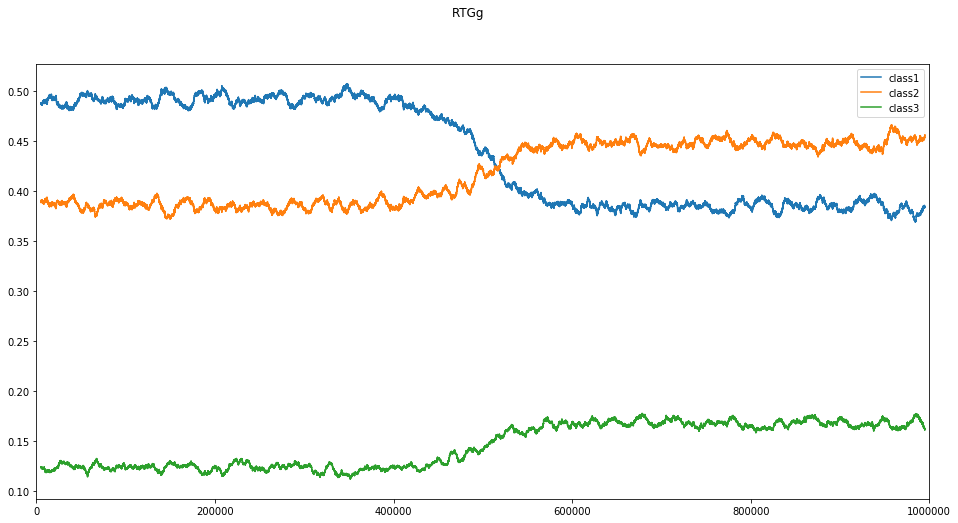

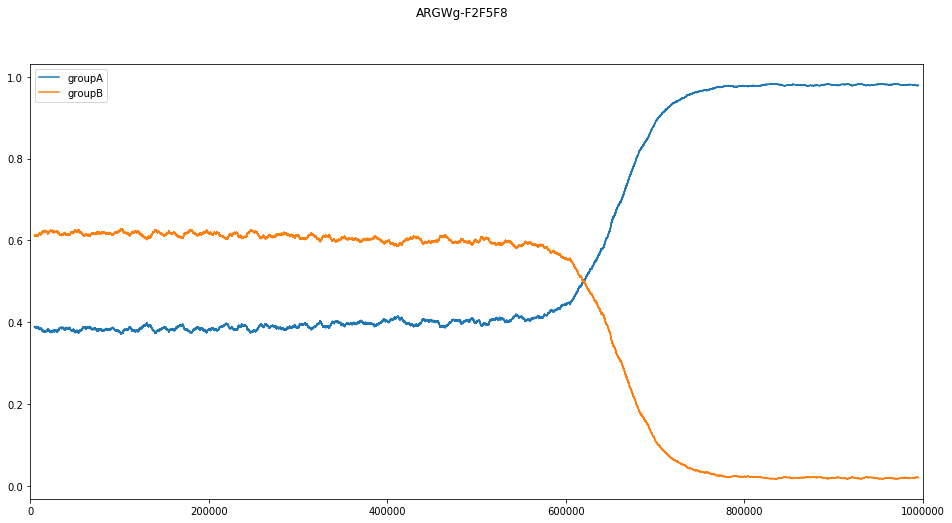

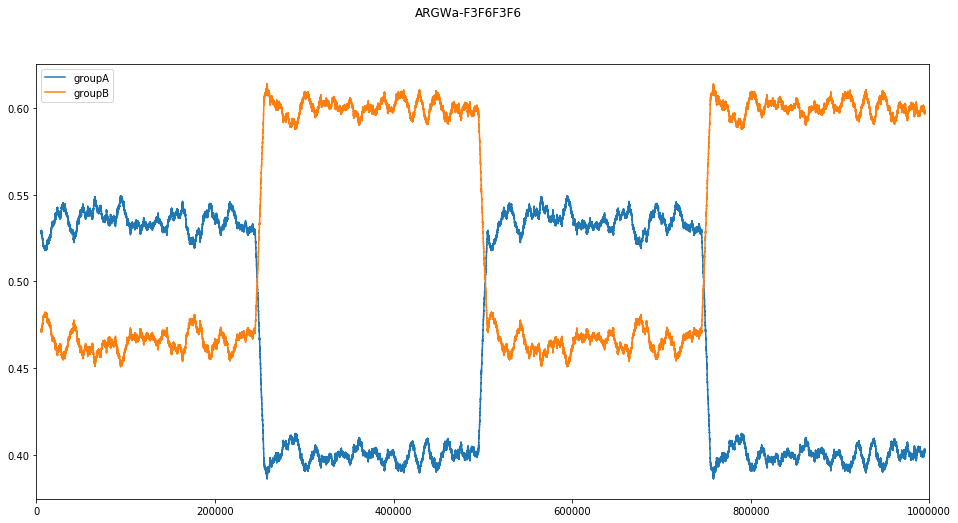

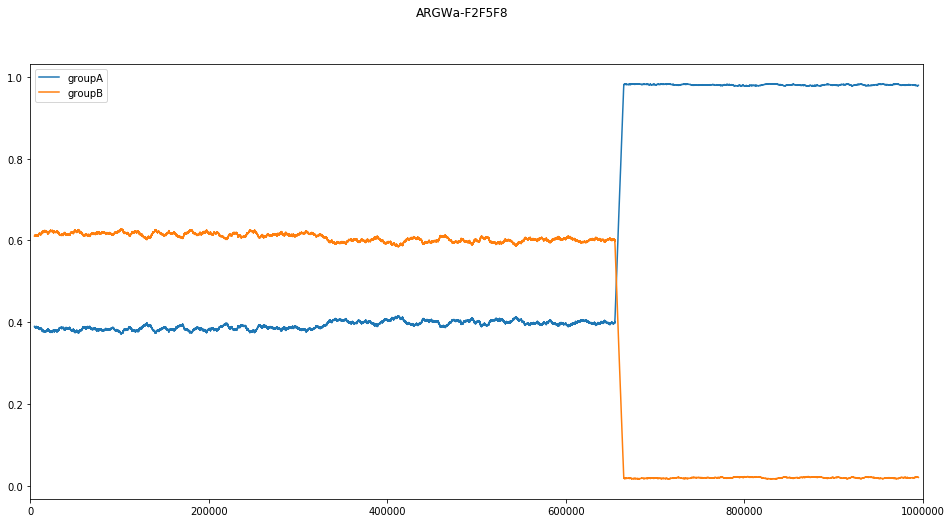

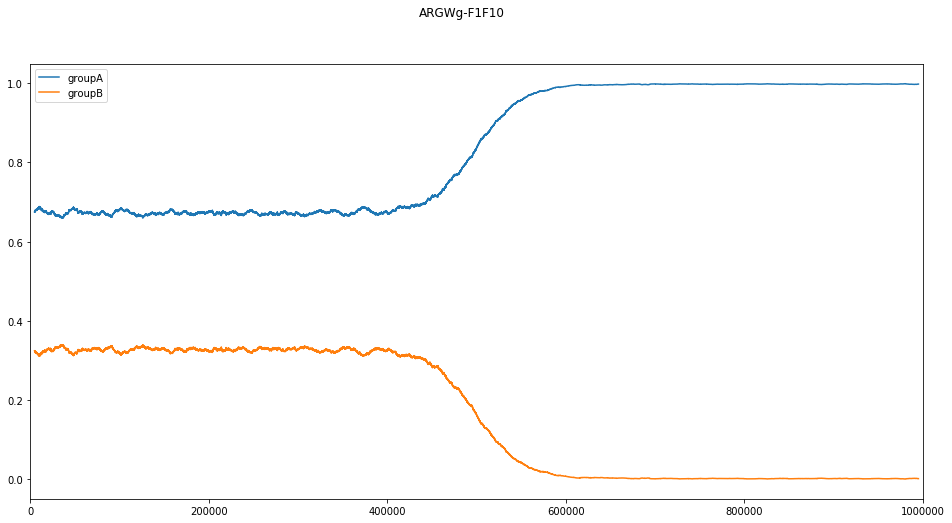

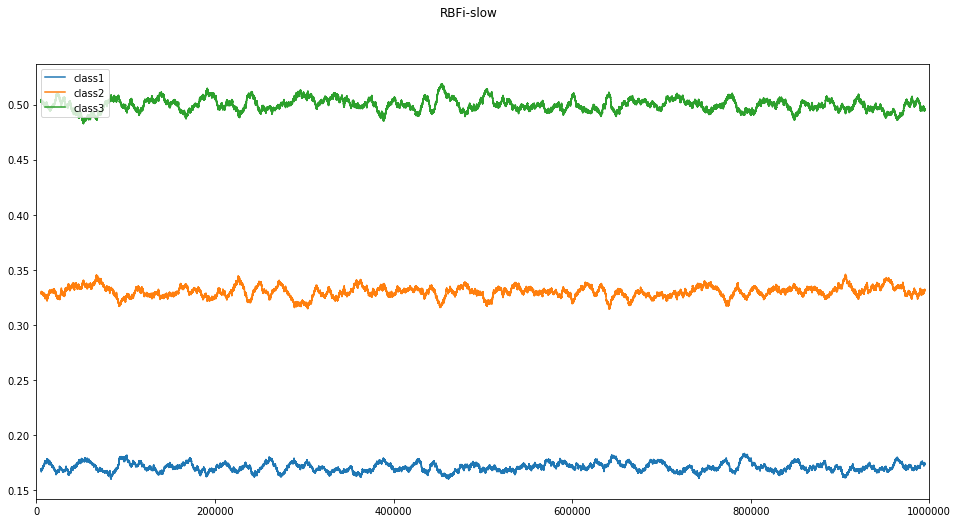

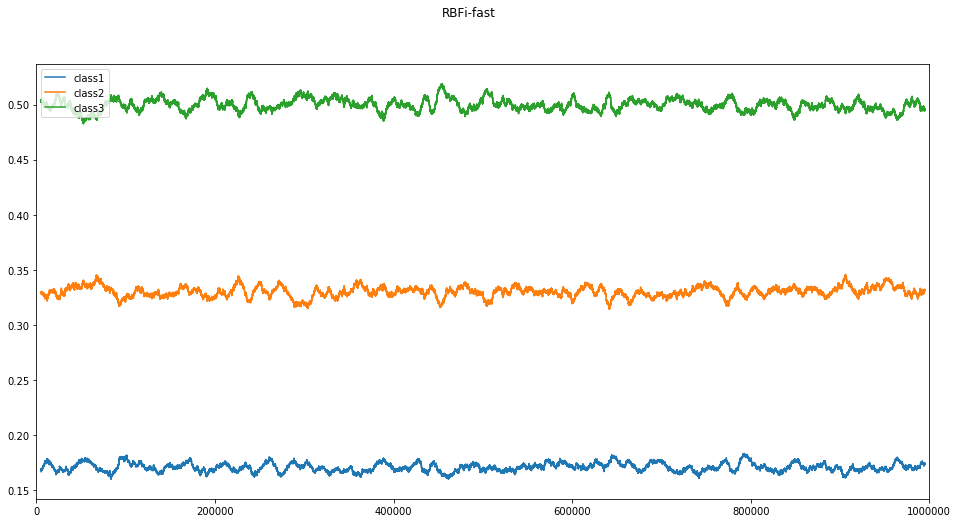

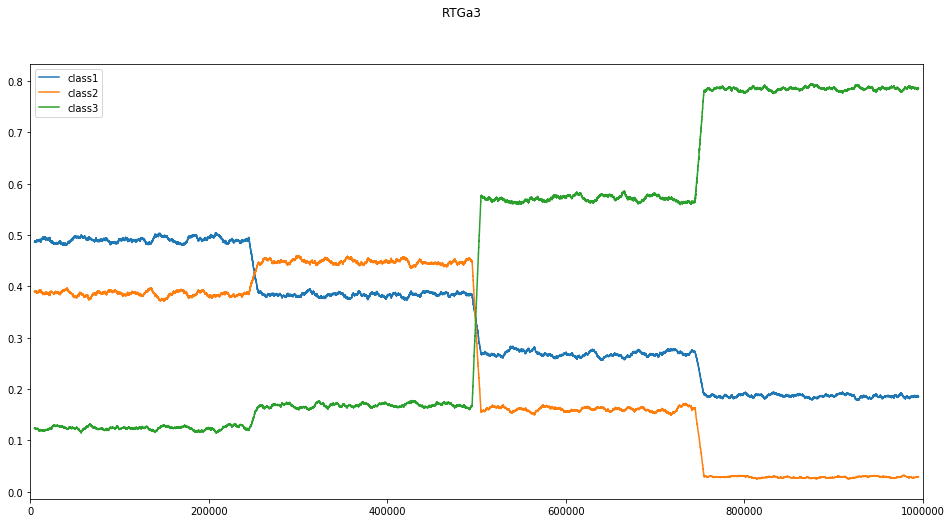

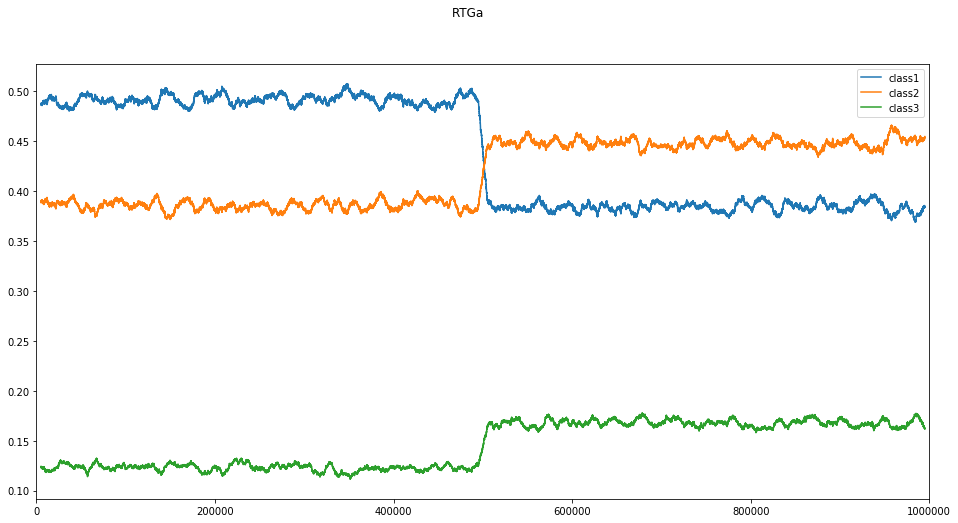

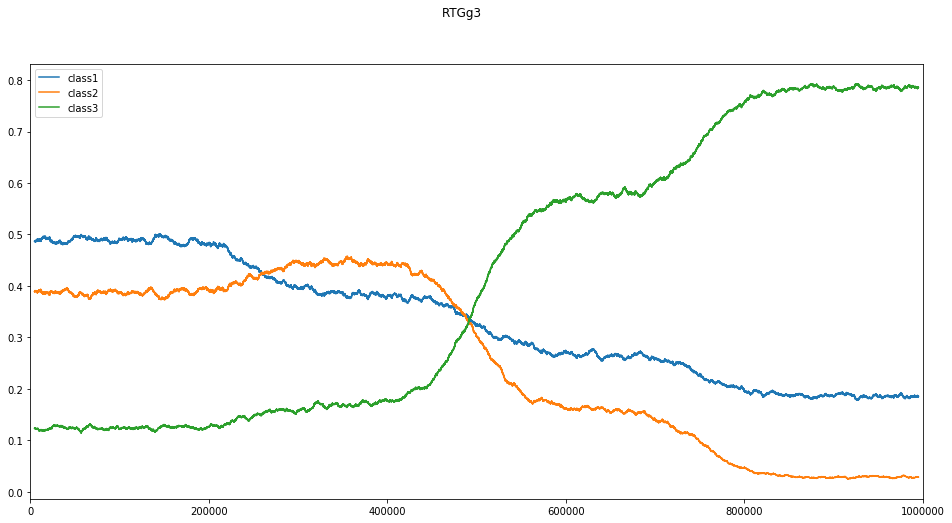

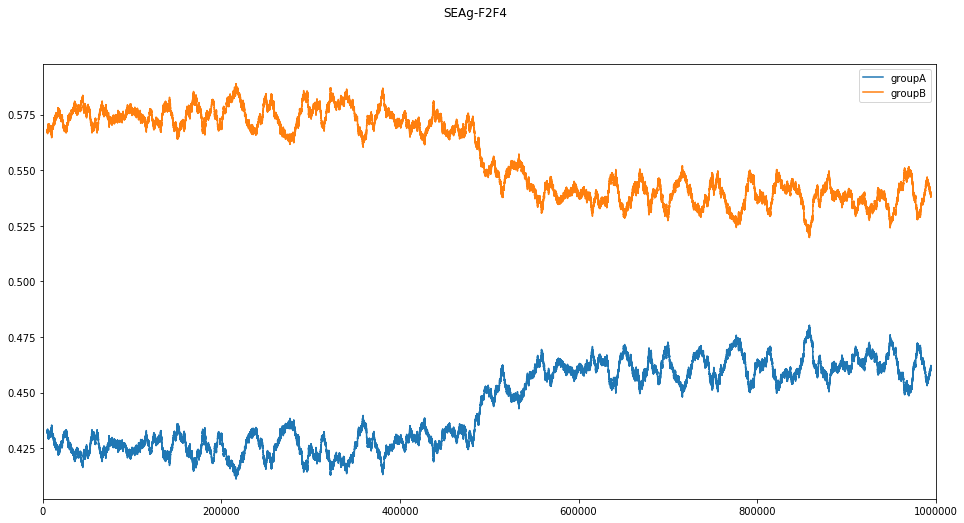

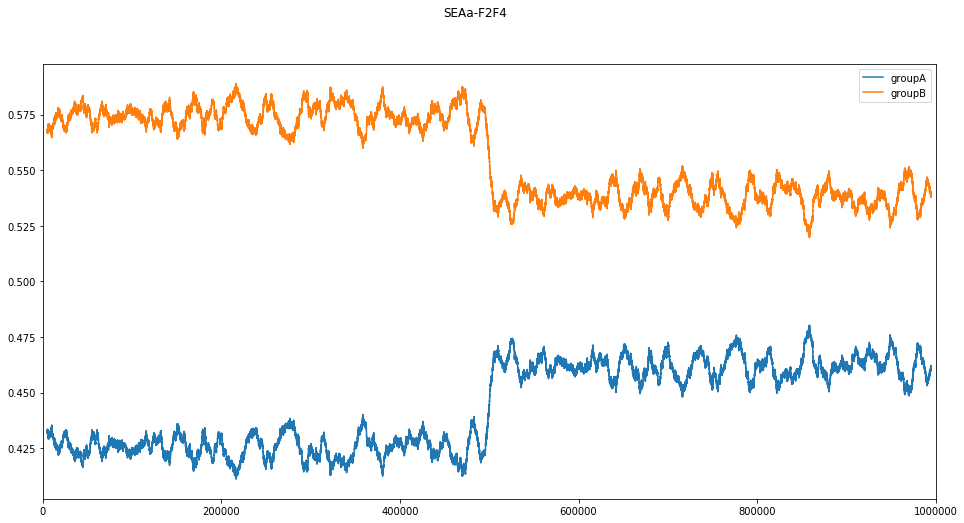

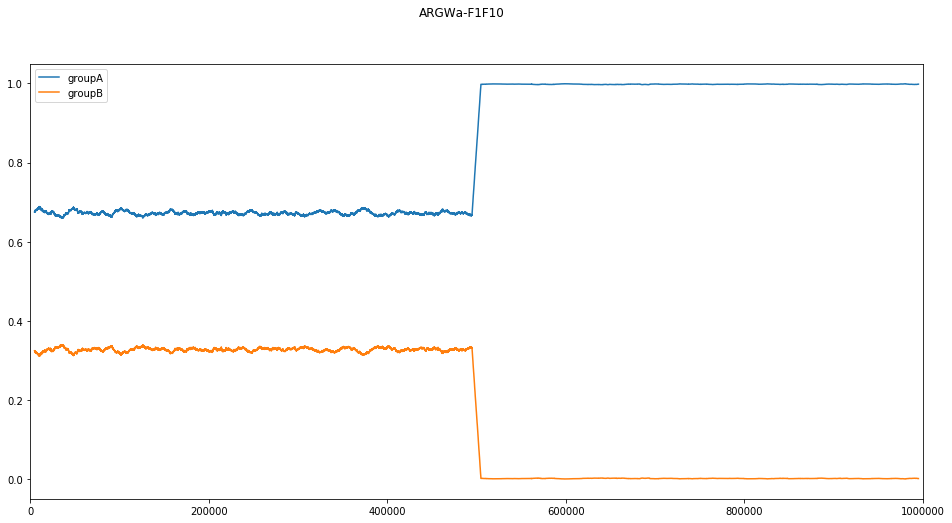

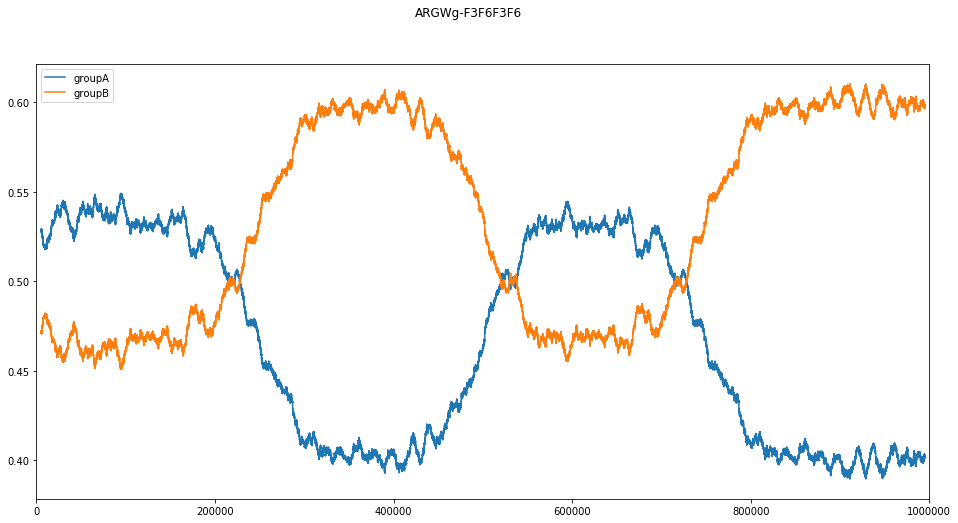

In [3]:
w = 10000

pdf_img_ls = []
for topic in datasets.keys():
    
    df_classes = pd.DataFrame()
    for c, d in datasets[topic].groupby('class')['class']:
        d = pd.Series([np.nan if i not in d.index else d[i] for i in datasets[topic].index])
        df_classes[c]=d.rolling(w, center=True).count()/w
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.suptitle(topic, fontsize=12)

    df_classes.iloc[int(w/2):-int(w/2)].plot(ax=ax)
    ax.set_xlim(0, len(df_classes))

    ax.legend()
    ax.get_figure().savefig(figures_path+topic+'.png')
    pdf_img_ls = pdf_img_ls + [figures_path+topic+'.png']
    fig.show()


In [4]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = figures_path+'datastreams_drift_classes.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


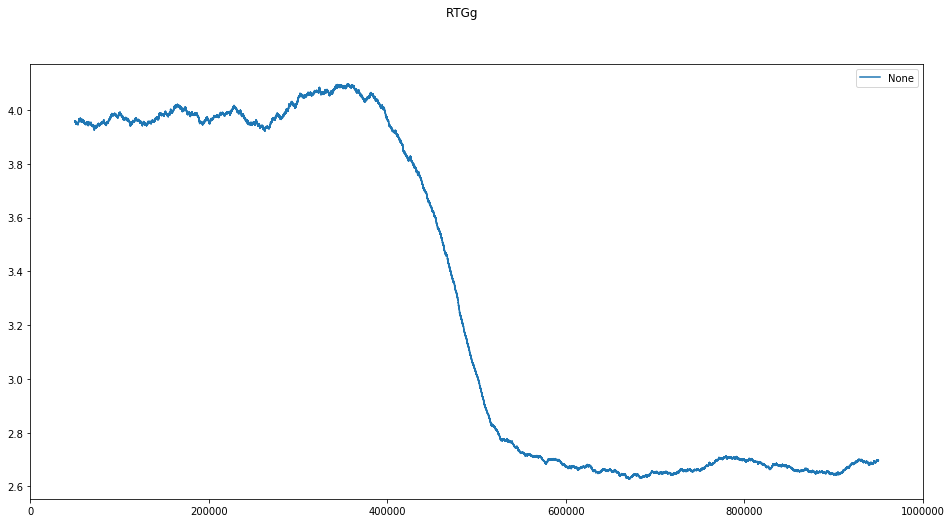

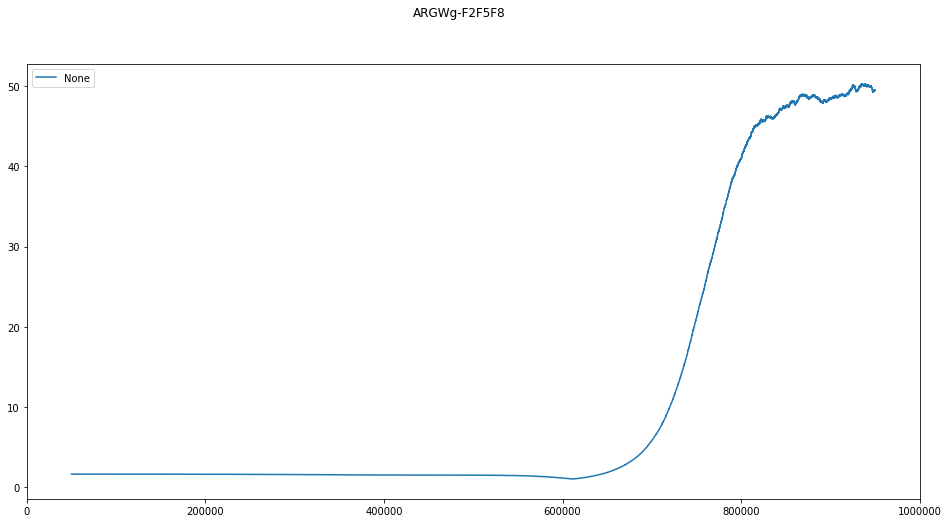

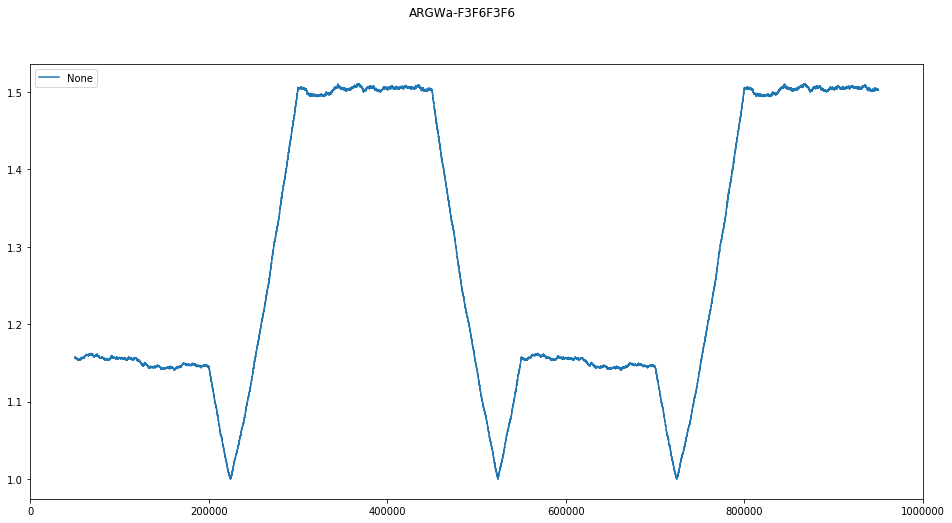

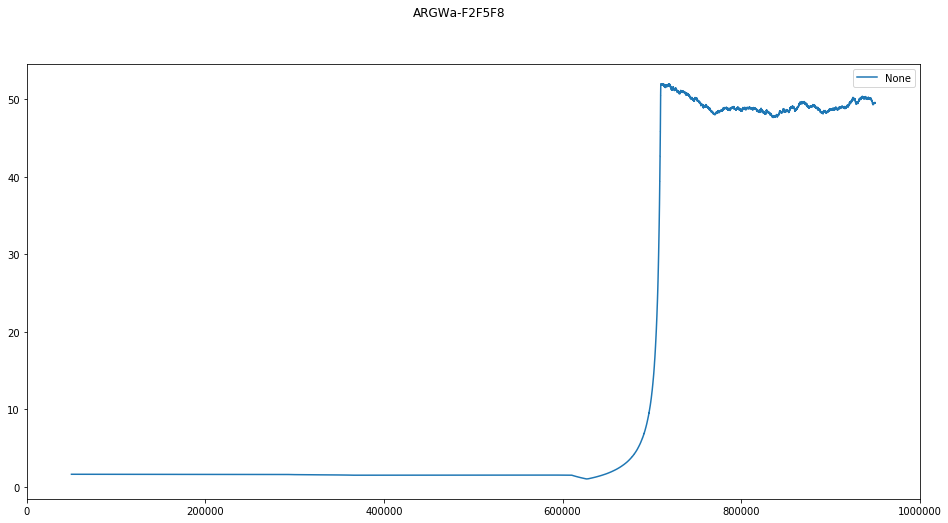

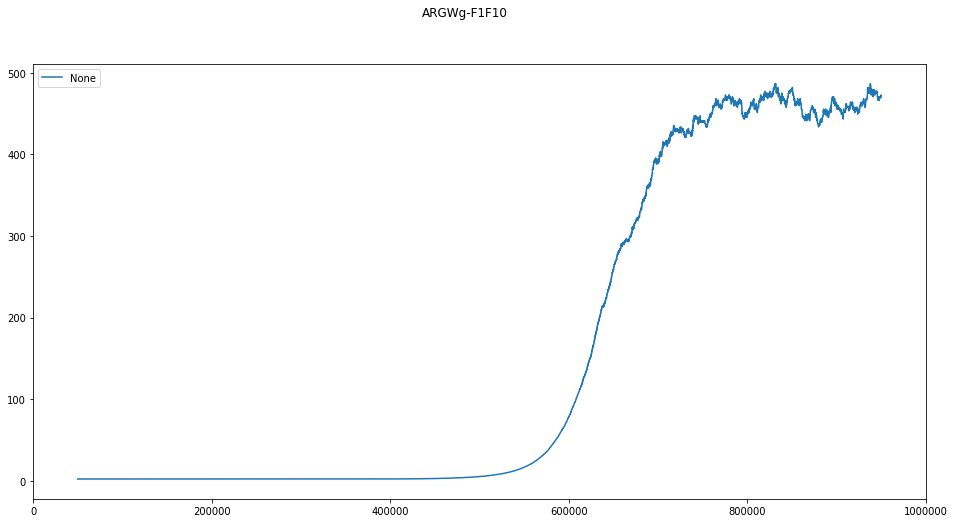

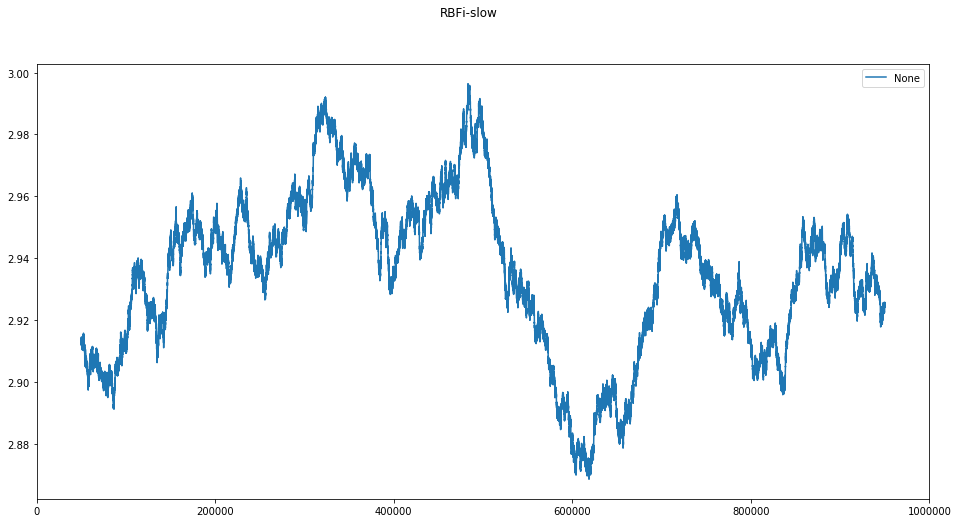

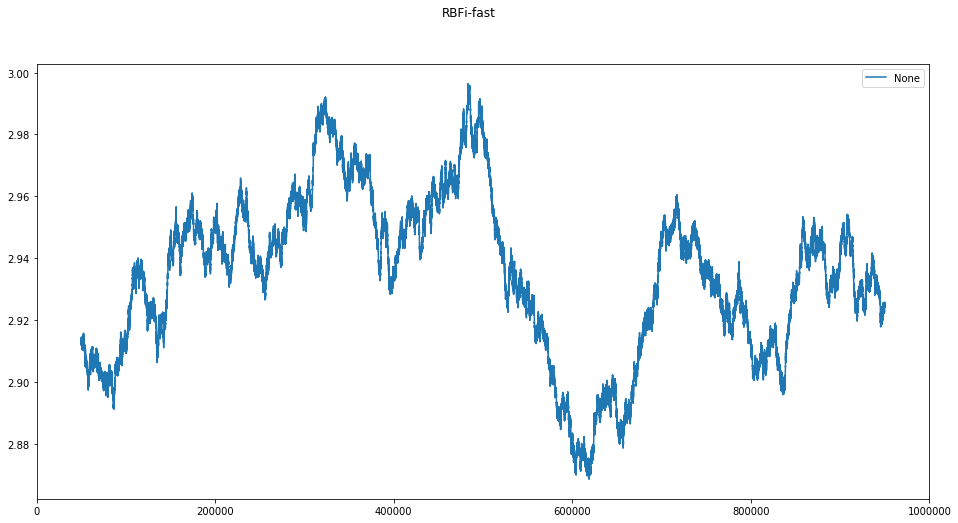

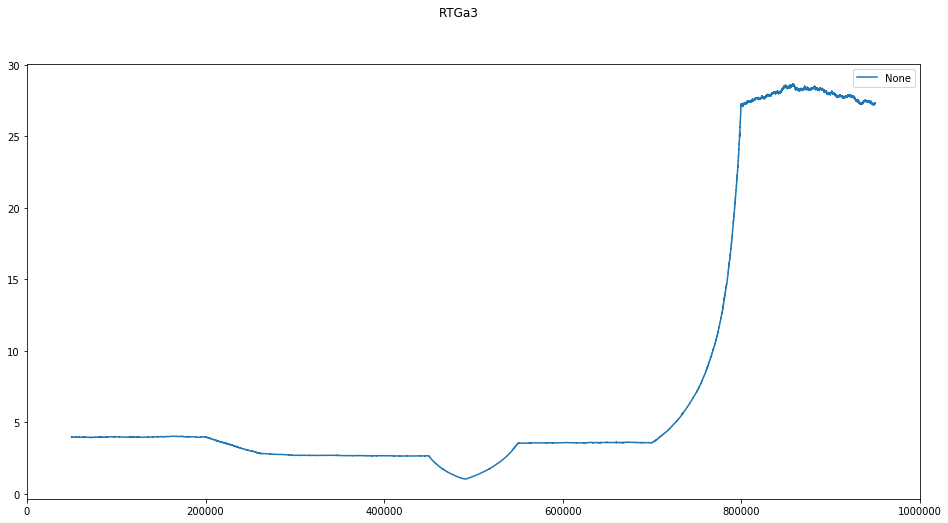

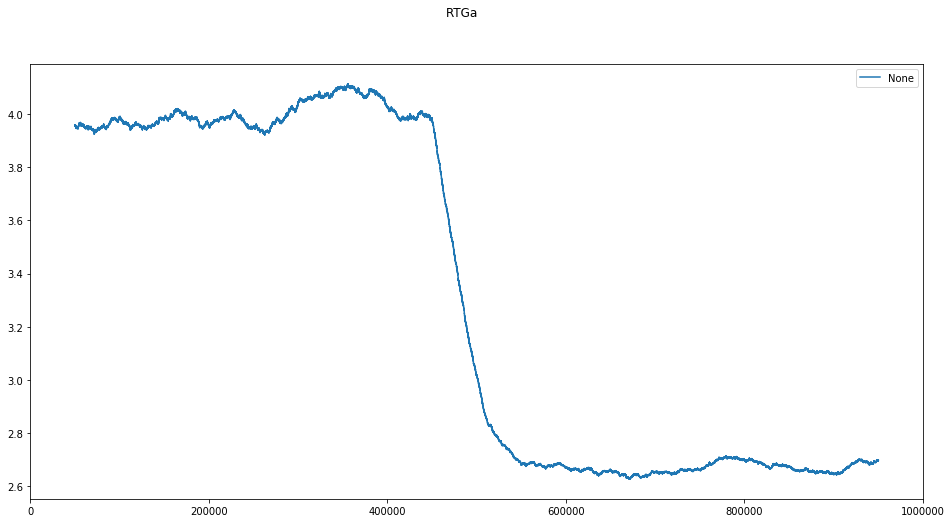

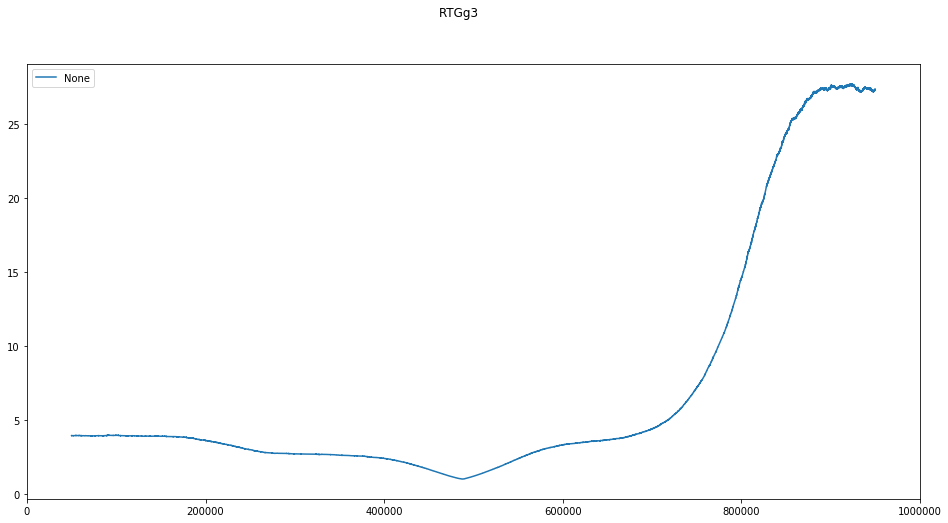

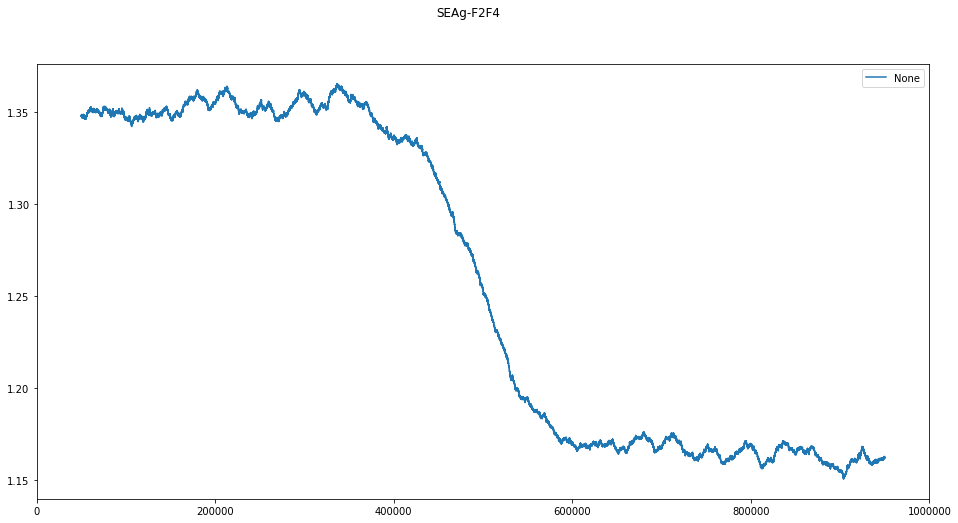

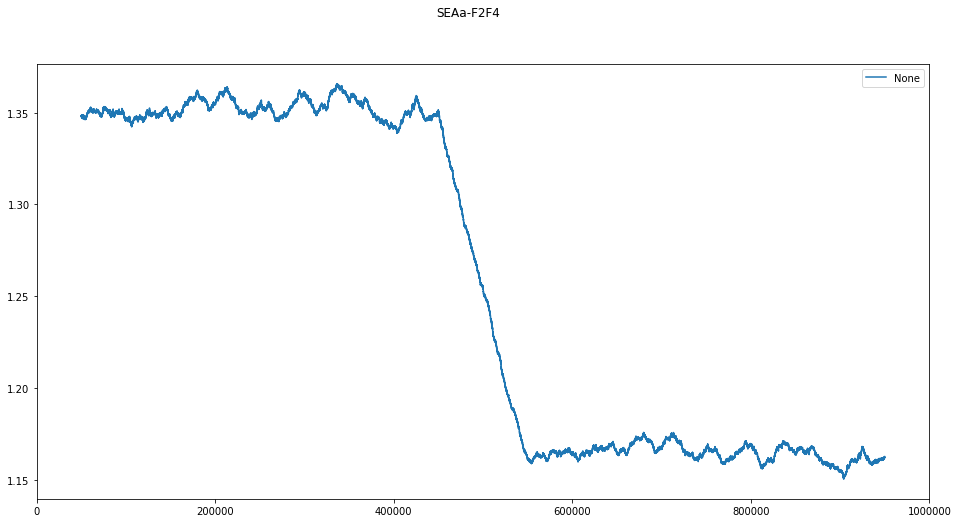

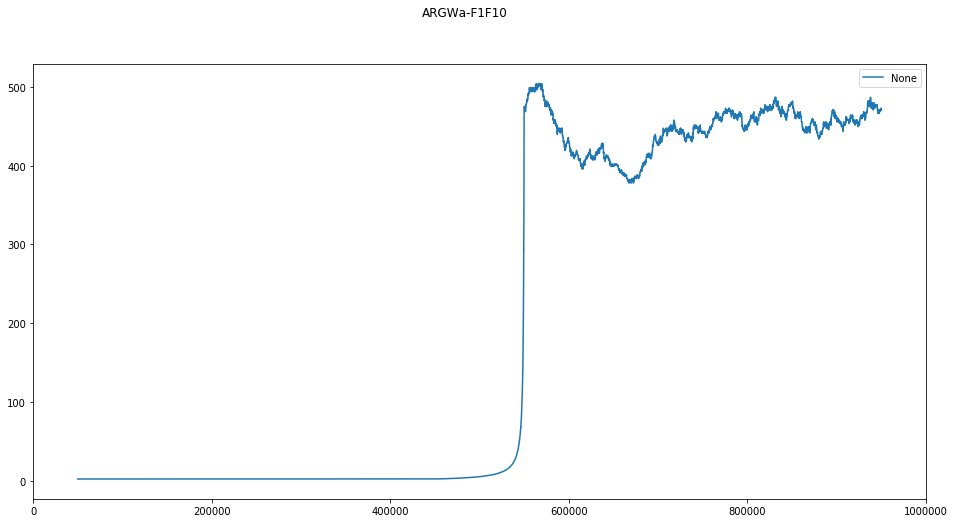

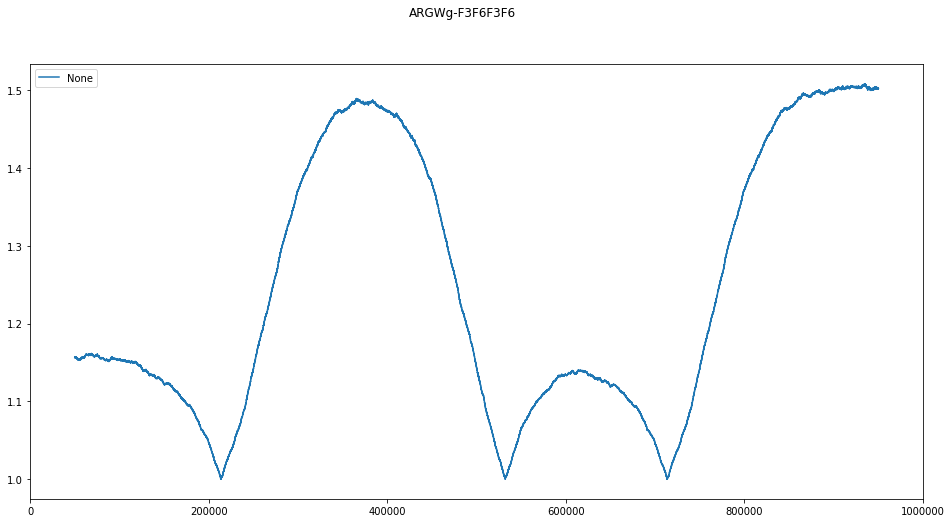

In [8]:
w = 100000

pdf_img_ls = []
for topic in datasets.keys():
    classes = pd.get_dummies(datasets[topic]['class']).rolling(w, center=True).sum()
    IR = classes.max(axis=1)/classes.min(axis=1)
    
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.suptitle(topic, fontsize=12)

    IR.iloc[int(w/2):-int(w/2)].plot(ax=ax)
    ax.set_xlim(0, len(IR))
    #ax.set_ylim(0, 20)

    ax.legend()
    ax.get_figure().savefig(figures_path+topic+'_IR.png')
    pdf_img_ls = pdf_img_ls + [figures_path+topic+'_IR.png']
    fig.show()


In [9]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = figures_path+'datastreams_drift_IR.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []